### Slade Brooks
##### brooksl@mail.uc.edu
##### 02.17.2023
# AeroComputing Assignment 4

This code

# Part 1

In [4]:
# import shtuff
import matplotlib.pyplot as plt
import numpy as np
import sys

# import custom modules
sys.path.append("..//lib//")
import pyvot

# Part 2

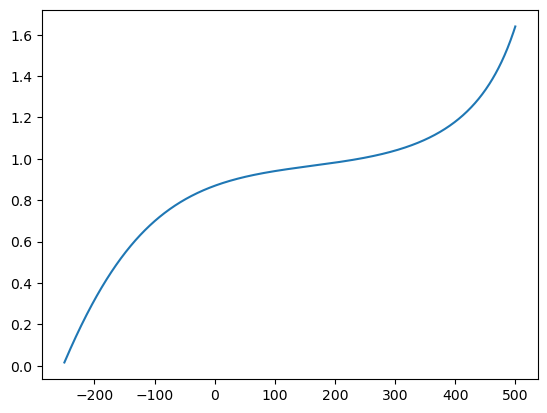

In [5]:
# solve with rational

# create data sets
T = np.array([-250., -200., -100., 0., 100., 300.])
cp = np.array([0.0163, 0.318, 0.699, 0.87, 0.941, 1.04])

# create i for indexing and array for vals
cps = np.empty(750, dtype="float64")

# set up new T range
Ts = np.linspace(-250, 500, 750)

# compute val at each T
for i in range(0, len(Ts)):
    cps[i] = pyvot.rational(T.copy(), cp.copy(), Ts[i])

plt.plot(Ts, cps)
plt.show()